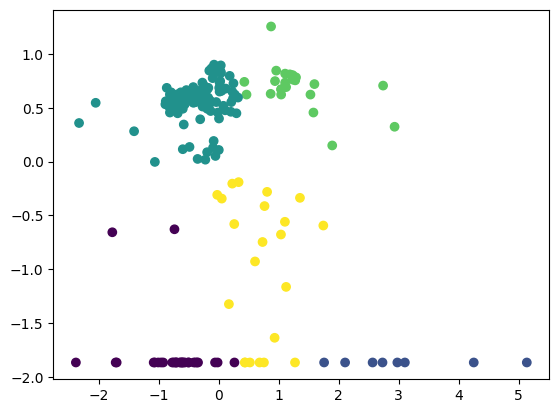

C:\Users\cfifz\AppData\Local\Temp\ipykernel_4568\2214168630.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, Silhouette_measure, 'bx-',color='green')


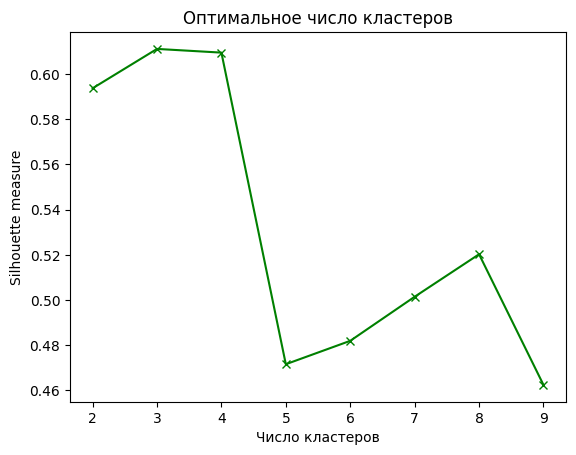

In [1]:
from fcmeans import FCM
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('glass.csv')
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)

df = pd.read_csv('glass.csv')
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df)

Z = df.iloc[:, [1, 3]].values
Z = scaler.fit_transform(Z)
Z = pd.DataFrame(Z)
Z_numpy = Z.to_numpy()

fuzzik = FCM(n_clusters=5)
fuzzik.fit(Z_numpy)
centers = fuzzik.centers
labels = fuzzik.predict(Z_numpy)
plt.scatter(df.iloc[:, 1], df.iloc[:, 3], c=labels, cmap='viridis')
plt.show()




Silhouette_measure = []
K = range(2, 10)
for num_clusters in K:
    fuzzik = FCM(n_clusters=num_clusters)
    fuzzik.fit(Z_numpy)
    labels = fuzzik.predict(Z_numpy)
    Silhouette_measure.append(silhouette_score(Z_numpy, labels))
plt.plot(K, Silhouette_measure, 'bx-',color='green')
plt.xlabel('Число кластеров')
plt.ylabel('Silhouette measure')
plt.title('Оптимальное число кластеров')
plt.show()

